<a href="https://colab.research.google.com/github/aniekh/personal_learning/blob/main/learninggoal2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Learning goal 2: Acquiring web-based data

### Original learning goal:

"*I want to learn how to find and acquire relevant web-based data. Currently I have very little knowledge on where to find relevant and useful data. In my studies so far I have mostly collected my own data during field- and lab work or worked with already available data. At the end of this course I want to know where I can find available data sets, be able to easily filter through these data sets, and know how to download them into python. Therefore I will produce a working Python Jupyter notebook with a procedure that demonstrates a commonly used way to find and acquire relevant datasets.*"

# Introduction
The goal of this Python Jupyter notebook is to show a commonly used way to find and acquire relevant web-besed datasets. 

Firstly, a brief introduction on different datatypes. In our project three datatypes were used:
1. `spatial data`:
references a specific geographical area or location.
2. `attribute data`:
represents a description for a data point or data object.
3.` metadata`:
defined as the data providing information about aspects of the data.

In this notebook I will show examples, relevant web-locations and possible uses for each of these data types.

### **Spatial data**
As previously stated, spatial data is used to show specific geographical areas or locations.  Programs to explore spatial data are geoda, qgis, arcgis, but also geopandas within Python can be used.  


Spatial data can be used to find the location, size, area or shape of any object. For example by using cooridinates of the object. It is often used for visualisation, through maps.


Let me show you how its done!


---



First we start by installing all important packages:


In [ ]:
#run only when geopandas is not yet installed
!pip install geopandas


In [ ]:
# Load all importance packages
import geopandas as gpd
import numpy as np
import pandas as pd
from shapely.geometry import Point
from unicodedata import normalize

import missingno as msn

import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
# Map with municipality-boundaries of the Netherlands from PDOK
geodata_url = 'https://geodata.nationaalgeoregister.nl/cbsgebiedsindelingen/wfs?request=GetFeature&service=WFS&version=2.0.0&typeName=cbs_gemeente_2017_gegeneraliseerd&outputFormat=json'
municipalities = gpd.read_file(geodata_url)
#municipalities

Text(0.5, 1.0, 'Simple map of the Netherlands')

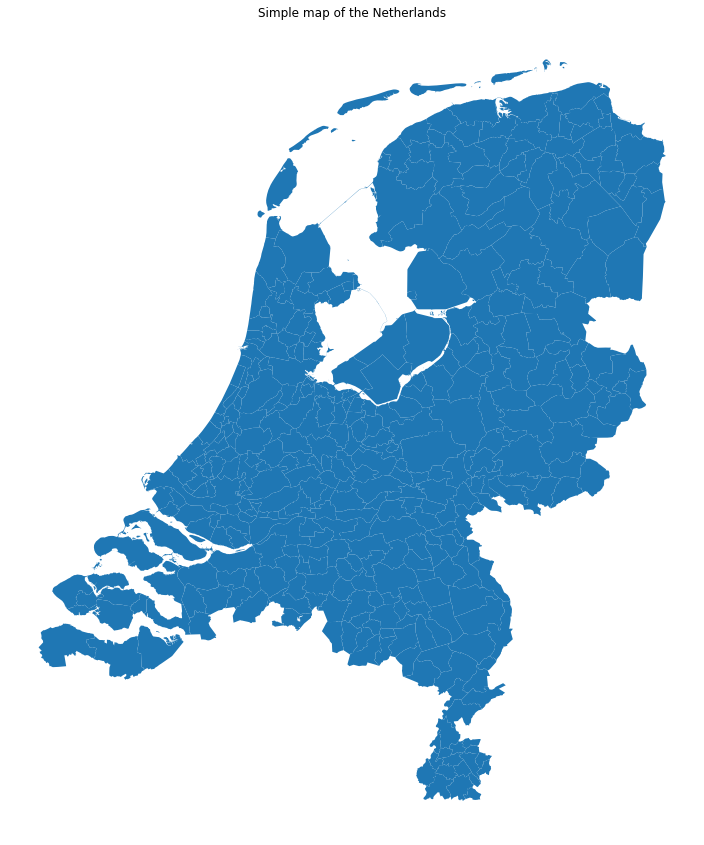

In [ ]:
p = municipalities.plot(figsize = (20,15))
p.axis('off')
p.set_title('Simple map of the Netherlands')


Look, you've just made a map using spatial data! Now let's move on to the next data type. 


#### **Attribute data**
By using attribute data we can give our map some meaning. Lets look at the nitrogen excretion in each municipalitie. For this we will use data from the CBS. Sadly, their dataset doesn't include a municipalitie code and it is not the same size. We'll  need this later on so lets fix this!


In [ ]:
nitrogen_exc = pd.read_csv('/content/Nitrogen_excretion_municipalities.csv',delimiter = ';')
nitrogen_exc['RegioS'] = nitrogen_exc['RegioS'].str.strip()
nitrogen_exc['nitrogen_excretion'].fillna(0, inplace=True)
#nitrogen_exc.head()


In [ ]:
municipalitie_codes = pd.read_csv('/content/Gemeenten alfabetisch 2017.csv',delimiter = ';')
municipalitie_codes['RegioS'] = municipalitie_codes['GemeentecodeGM'].str.strip()
#municipalitie_codes.head()


In [ ]:
data = pd.merge(nitrogen_exc, municipalitie_codes,left_on = 'RegioS', right_on = 'Gemeentenaam')
data = data.drop(columns=['Gemeentenaam','GemeentecodeGM'])
#data.head()



Now that we've added the two together, let's plot them!

Text(0.5, 1.0, 'Nitrogen excretion from cattle in the Netherlands in 2021')

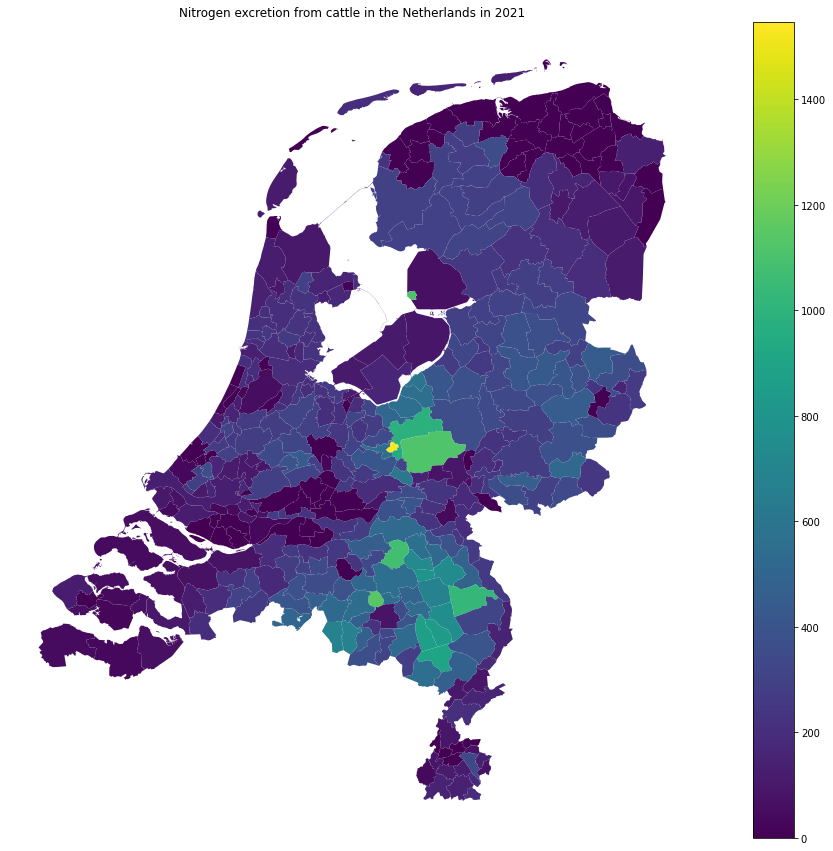

In [ ]:
municipalities_with = pd.merge(municipalities,data,left_on='statcode',right_on='RegioS_y', how = 'left')
municipalities_with['nitrogen_excretion'].fillna(0, inplace=True)
p = municipalities_with.plot(column='nitrogen_excretion',figsize = (20,15), legend=True)
p.axis('off')
p.set_title('Nitrogen excretion from cattle in the Netherlands in 2021')

look: our 'empty' map is now filled and has attributes added to it, there is now a value given to each municipality! For more in depth visualisation, take a look at my other jupyter notebook on data visualisation. 

This time we used [CBS](https://opendata.cbs.nl/statline/#/CBS/en/) data, some other relevant sources for geodata are:
- [Atlas Leefomgeving](https://https://www.atlasleefomgeving.nl/)
- [Nationaal Georegister](https://www.nationaalgeoregister.nl/geonetwork/srv/dut/catalog.search#/home)
- [PDOK](https://www.pdok.nl/)

take a look for yourself! For now, let's move on to our last type of data, this will explain how to find relevant data.


#### **Metadata**
Often the most forgotten data type, however absolutely necessary when using data or if someone else is going to use your data. Metadata is data that describes other data. It contains information like tags and categories, when it was created, sources, authors, manipulations and how to the acquire the data. It is used for organisation of dataframes and makes it much easier to see what is in there. Metadata is not only used for dataframes. Think of when you are looking for a new book:  you can check the title, author, publisher, year, sometimes a summary or table of contents. This way you can easily check if the book is relevant for you. In the same way it can be used to filter through datasets.

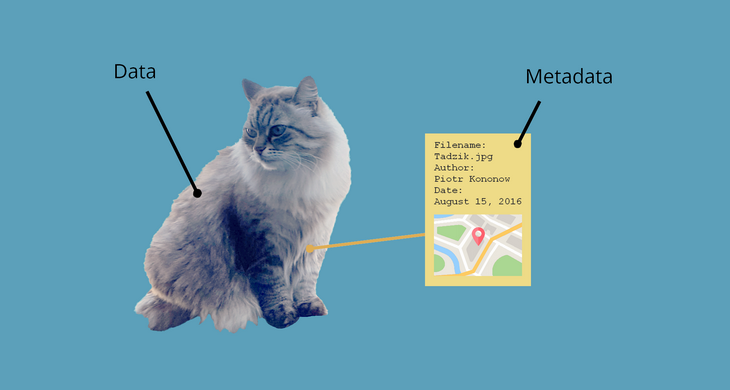

When looking at the Nationaal Georegister (below), without a filter you have 8162 datasets available! Way too many to look through. 

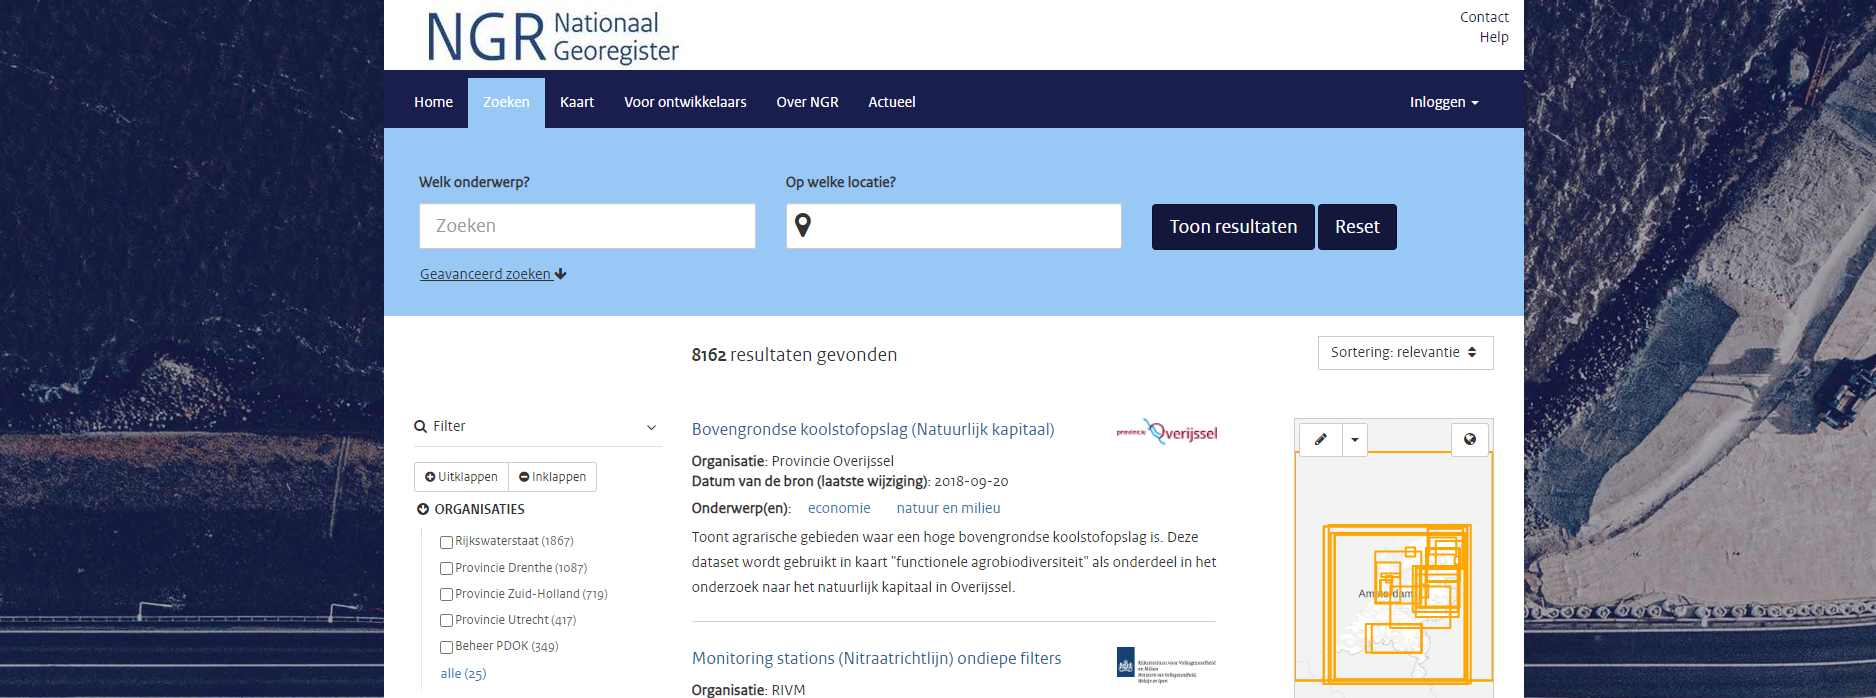

You have options to filter by organisation, topics, scales, and much more. And when you've eventually chosen a dataset, you can take a look at its metadata! There is information on the topic, source, data type, and much more. Now its possible to check if this dataset is usefull for you before downloading it. 

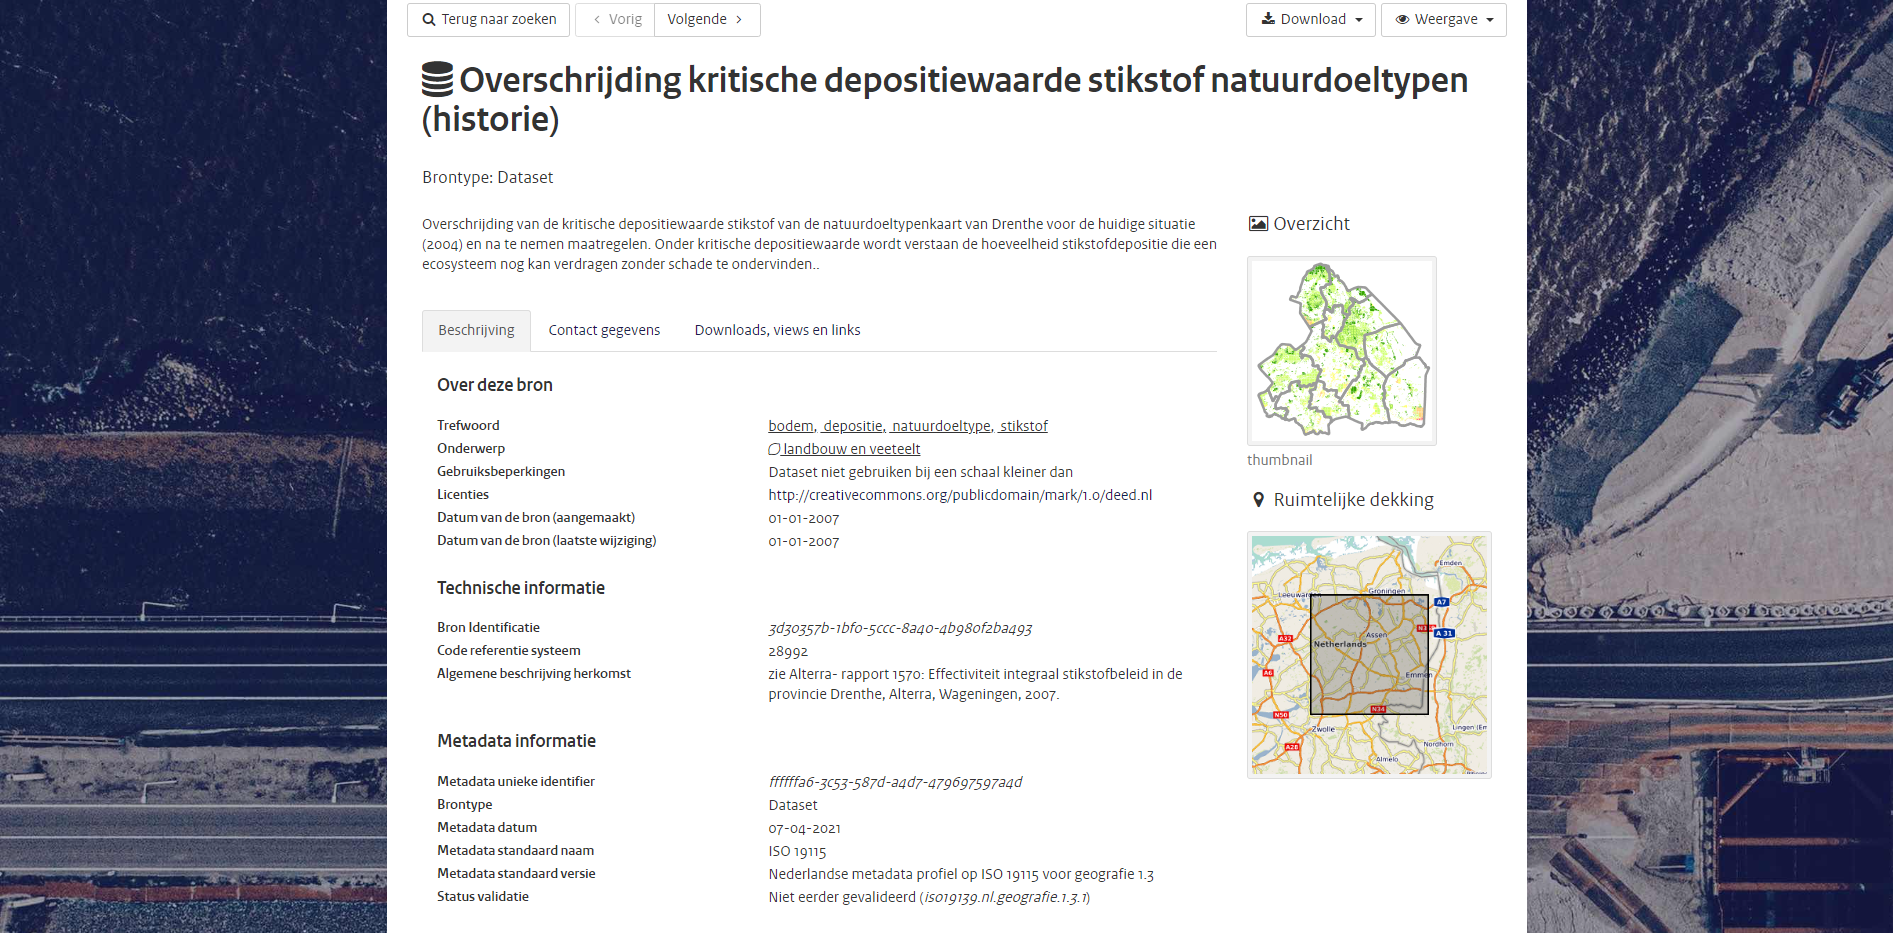

##Note on the ethical question of  data
When using data for a project, always be carefull of the data you are using on how you are obtaining it. In this notebook we've  worked with 'measured' data (which of course can also contain bias!), but you can also use publically available data from social media. In the latter case it is important to be well aware of the fact that you are working with the data of actual human beings. Think of how you are collecting the data and if this is ethically right. In our project we worked with Twitter data and we argued that there is a lack of awareness amongst Twitter users regarding the Terms of Service and that the policies on the usage of Twitter data are not protective enough to its users. It is important to think critically about consent and when there is a need to reobtain it (spoiler: there is when using social media data!). Also think  critically of what you will be doing with your data and what can be the (unwanted) effects that arise from your research or products when it is published. 


#### *This concludes this Notebook. In this Jupyter Notebook we've discussed three different types of data and looked at the different applications and uses of each one.*



####**sources**
- https://geol260.academic.wlu.edu/course-notes/introduction-and-data-types/3-types-of-data/)
- https://dataedo.com/kb/data-glossary/what-is-metadata 
https://www.cbs.nl/nl-nl/onze-diensten/methoden/classificaties/overig/gemeentelijke-indelingen-per-jaar/indeling-per-jaar/gemeentelijke-indeling-op-1-januari-2017 
- https://opendata.cbs.nl/statline/#/CBS/nl/dataset/70072NED/table?fromstatweb 
- Tutorial *'3.3 Kmeans_CBS_pigs_map'* from the course Data Science for Smart Environments WUR GRS35306_2021_5